In [21]:
from Bio.PDB import *
import Bio as Bio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

%matplotlib notebook

In [22]:
def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [-180,180]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / math.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle

Задаём парсер для считывания файла типа PDB. В данном примере взят случайный белок под номером 5y2k

In [23]:
parser = PDBParser()

In [24]:
structure = parser.get_structure('5y2k', '5y2k.pdb')

D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26760.
  PDBConstructionWarning)
D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26980.
  PDBConstructionWarning)
D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27154.
  PDBConstructionWarning)
D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27248.
  PDBConstructionWarning)
D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27302.
  PDBConstructionWarning)
D:\Programms\Anaconda\lib\site-packages\Bio\PDB\StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27620.


PDB файл подчиняется иерархии:
1. Модель (для белков она обычна одна и не представляет особого интереса)
2. Цепочки, из которых состоит модель, и им присваиватся id (обычно латинская буква)
3. Аминокислотные остатки, коорые составляют цепочки (кодируются названием АК и номером)
4. Непосредственно атомы

С помощью перебора ниже можно посмотреть все атомы во всех АК остатках во всех цепочках

In [ ]:
for model in structure:
    print(model)
    for chain in model:
        print(chain)
        for residue in chain:
            print(residue)
            for atom in residue:
                print(atom)

Так же можно получать доступ к конкретным элементам в pdb файле

In [25]:
model = structure[0]
chain = model['A']# конкретная цепочка
residue = chain[1]# конкретный остаток
atom = residue['CA'] # конкретный атом

### Углы $\phi$ и $\psi$

 Углы вращения вокруг вокруг связей N-Ca и Са-С(O) называют соответственно углами $\phi$ и $\psi$.
 Значение углов $\phi$ и $\psi$ для какого-либо аминокислотного остатка характеризуют его положение во вторичной структуре. Если указать эти значения для всей последовательности аминокислот, то ими определится свертывание данного полипептида в пространстве. Принципиально возможны любые наборы значений двухгранных углов $\phi$ и $\psi$, однако многие из них сопряжены со значительными стерическими помехами и отвечают весьма невыгодным энергетическим конформациям.

Чтобы получить эти углы, нужно сначала построить пептидные свзяи между АК остатками, насколько я понял.
Это делается указанным ниже кодом

### PPBuilder
Use C--N distance to find polypeptides.

Изначально я решил получить углы $\phi$ и $\psi$ для всего белка и разметить его для каждой цепочки, но, насколько я понял, это не имеет особого смысла и для нас больший интерес представляют группы внутри самой цепочки, которые могут быть альфа-спиралям и бета-слоями.

In [51]:
phi_psi_list=[]
phi_psi = []
for model in structure:
    #for chain in model :
        polypeptides = PPBuilder().build_peptides(model['A'])#строим пептидные связи для остатков, которые состовляют цепочки
        for poly_index, poly in enumerate(polypeptides) :
                #print ("Model %s Chain %s" % (str(model.id), str(chain.id)))
                #print ("(part %i of %i)" % (poly_index+1, len(polypeptides)))
                #print ("length %i" % (len(poly)))
                #print ("from %s%i" % (poly[0].resname, poly[0].id[1]))
                #print ("to %s%i" % (poly[-1].resname, poly[-1].id[1]))
            phi_psi+= poly.get_phi_psi_list()
                #for res_index, residue in enumerate(poly) :
                #    res_name = "%s%i" % (residue.resname, residue.id[1])
                #    print (phi_psi[res_index], str(chain.id))
                #    phi_psi_list.append([phi_psi[res_index][0], phi_psi[res_index][1], str(chain.id)])

In [52]:
phi_psi[0:5]# первые пять пар углов для пептидов в цепи А

[(None, 2.728319037212277),
 (-1.1619693926277035, 2.397800856192831),
 (-2.725691321302176, 2.6541870900447804),
 (-2.2778485369361547, 2.294221744310805),
 (-2.302248189736944, 1.7379074848063898)]

Есть так же функция Polypeptide.Polypeptide, но проблема в том, что Polypeptide.Polypeptide игнорировал всю дополнительную проверку, полученную при его использовании с использованием классов PPBuilder или CaPPBuilderи отличия будут в том, что он будет определять воду как пептид.

In [53]:
phi_psi_list_an=[]
for chain in model :
    poly = Polypeptide.Polypeptide(chain)
    phi_psi_list_an += poly.get_phi_psi_list()

In [54]:
#phi_psi_list_an = np.asarray(phi_psi_list_an)

In [55]:
#phi_psi_array =  np.asarray(phi_psi_list)
phi_psi_a = np.asarray(phi_psi)

In [56]:
#for i in range(len(phi_psi_array)):
#    if phi_psi_array[i,2] == 'A':
#        phi_psi_array[i,2] = 1
#    if phi_psi_array[i,2] == 'B':
#        phi_psi_array[i,2] = 2
#    if phi_psi_array[i,2] == 'C':
#        phi_psi_array[i,2] = 3
#    if phi_psi_array[i,2] == 'D':
#        phi_psi_array[i,2] = 4
#    if phi_psi_array[i,2] == 'E':
#        phi_psi_array[i,2] = 5
#    if phi_psi_array[i,2] == 'F':
#        phi_psi_array[i,2] = 6
#    if phi_psi_array[i,2] == 'G':
#        phi_psi_array[i,2] = 8
#    if phi_psi_array[i,2] == 'H':
#        phi_psi_array[i,2] = 7
#    for j in range(2):
#        phi_psi_array[i,j] = degrees(phi_psi_array[i][j])

In [57]:
for i in range(len(phi_psi_a)):
    for j in range(2):
        phi_psi_a[i,j] = degrees(phi_psi_a[i][j]) # переводим из радиан в градусы

<IPython.core.display.Javascript object>


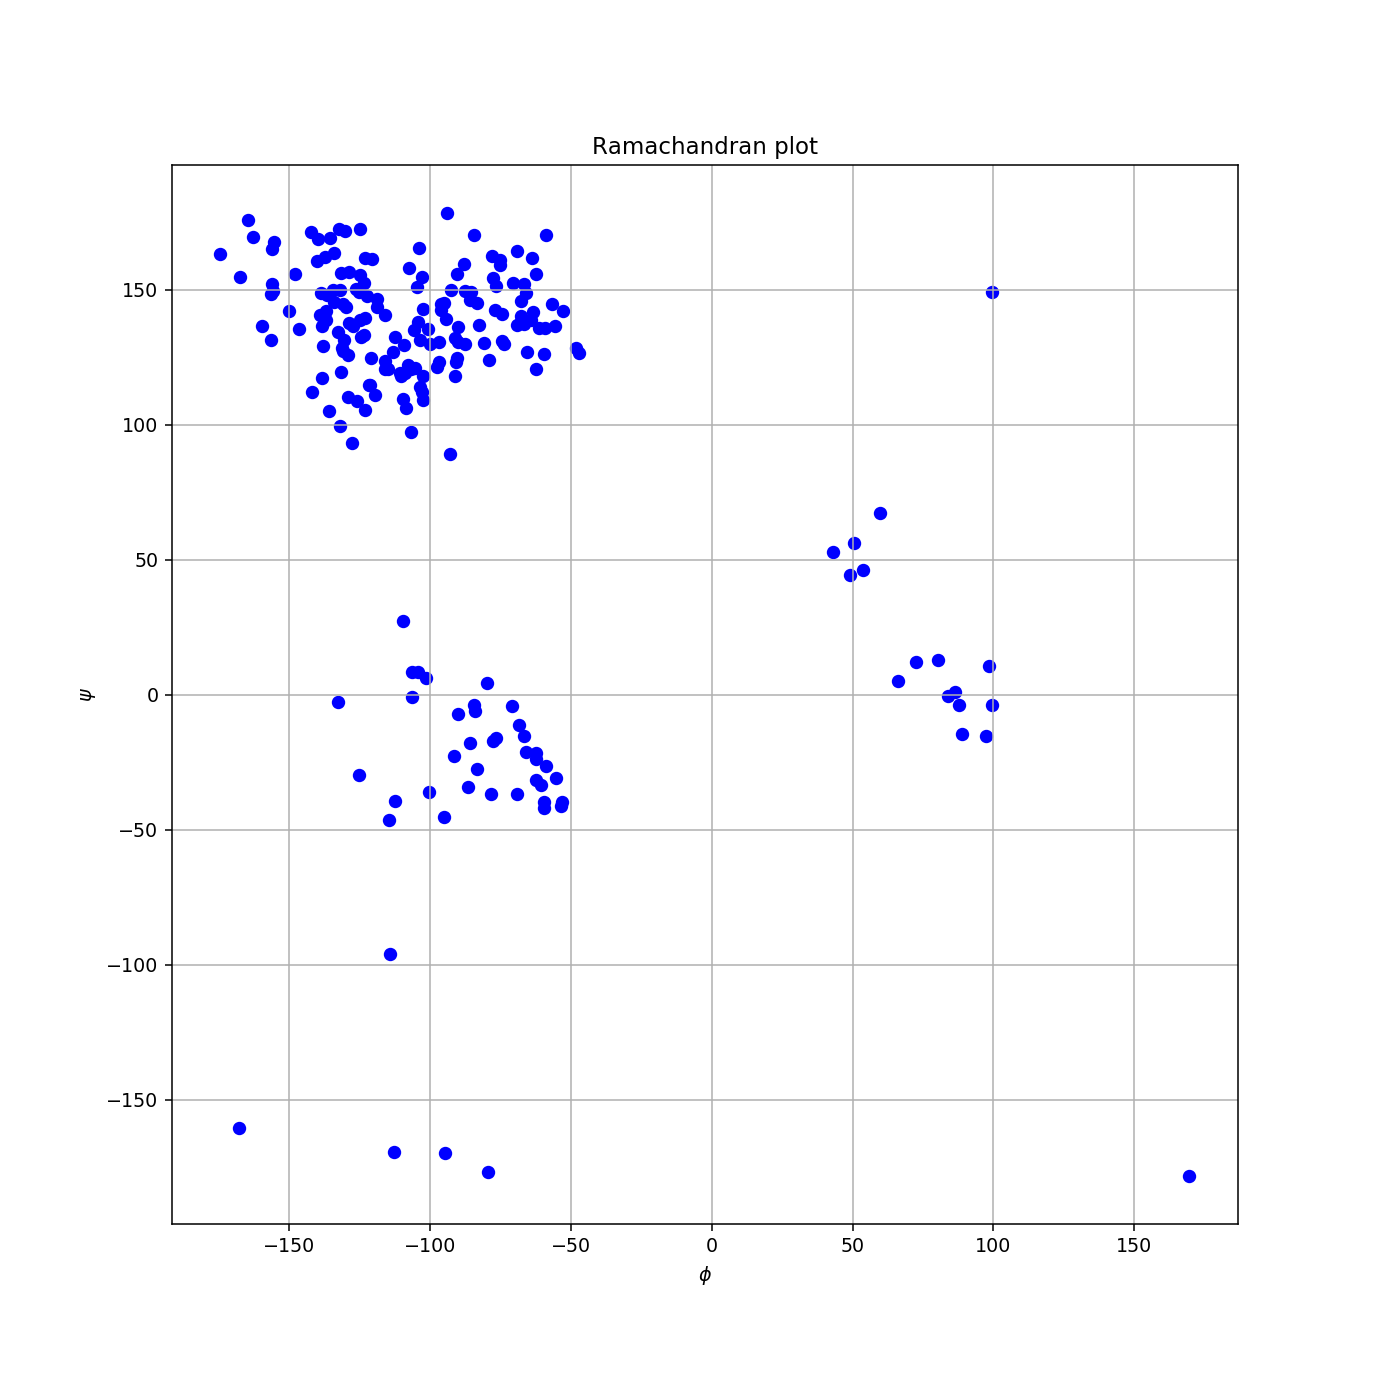

In [59]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.set_title('Ramachandran plot')
ax.scatter(phi_psi_a[::,0], phi_psi_a[::,1], c='b')#, c=phi_psi_array[::,2]/max(phi_psi_array[::,2]), cmap = 'rainbow')
#ax.scatter(phi_psi_list_an[::,0], phi_psi_list_an[::,1], c='r')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\psi$')
ax.grid()

In [65]:
#atom_list = Selection.unfold_entities(structure, 'A')# всё атомы из нашей структуры

In [67]:
atom_list = Selection.unfold_entities(model['C'], 'A')# атомы из конкретной цепочки

In [68]:
s=np.zeros((len(atom_list),3))
for i in range(len(atom_list)):
        for j in range(3):
            s[i,j] = (atom_list[i].get_vector()[j]) # получаем координаты атомов

In [69]:
#s1 = [] # тут происходит примерно то же самое, но с запоминанием имени цепочки 
#s3 = []
#for i in range(len(atom_list)):
#for k in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
#    chain = model[k]
#    s1 = Selection.unfold_entities(chain, 'A')
#    for i in range(len(s1)):
#        s3.append([atom_list[i].get_vector()[0], atom_list[i].get_vector()[1], atom_list[i].get_vector()[2], str(k)]) 

In [70]:
#s2 =  np.asarray(s3)

In [71]:
#for i in range(len(s2)):
#    if s2[i,3] == 'A':
#        s2[i,3] = 1
#    if s2[i,3] == 'B':
#        s2[i,3] = 2
#    if s2[i,3] == 'C':
#        s2[i,3] = 3
#    if s2[i,3] == 'D':
#        s2[i,3] = 4
#    if s2[i,3] == 'E':
#        s2[i,3] = 5
#    if s2[i,3] == 'F':
#        s2[i,3] = 6
#    if s2[i,3] == 'G':
#        s2[i,3] = 8
#    if s2[i,3] == 'H':
#        s2[i,3] = 7

In [72]:
#s2=np.array(s2, dtype=float)

Решил попробовать посмотреть на расположение атомов по их координатам в пространстве. Опять же хотел посмотреть на атомы по принадлежности к их цепочкам, но получилось не слишком наглядно и решил вывести только для одной цепи

<IPython.core.display.Javascript object>


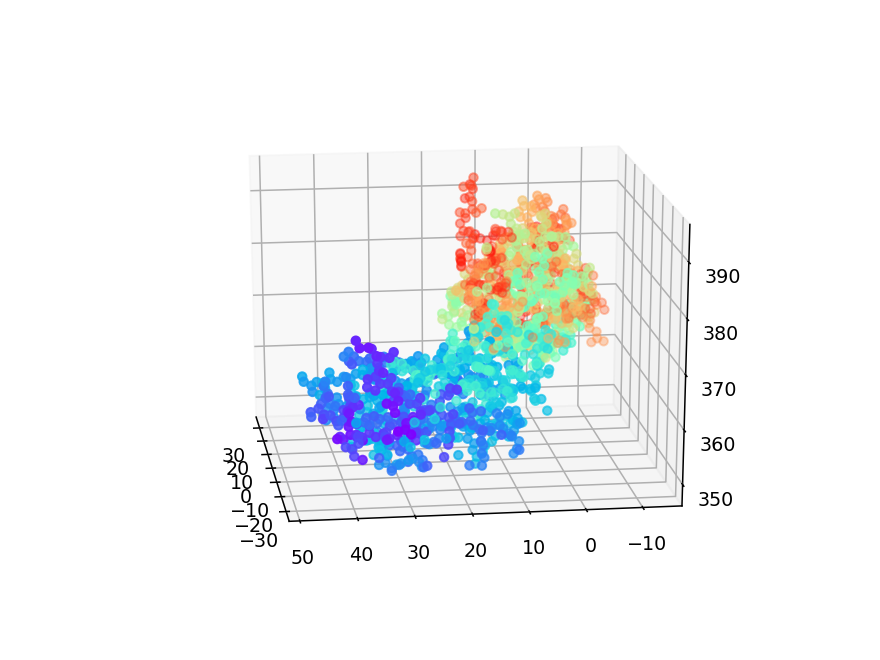

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(s[:9,0], s[:9, 1], s[:9, 2], c='r' ,cmap='rainbow')
#ax.scatter(s[9:,0], s[9:, 1], s[9:, 2], c='b' ,cmap='rainbow')
#ax.scatter(s2[::,0], s2[::, 1], s2[::, 2], c=s2[::,3]/max(s2[::,3]), cmap = 'rainbow')
ax.scatter(s[::,0], s[::, 1], s[::, 2], c=s[::, 0], cmap = 'rainbow')
ax.grid()

Можно посмотреть на список пептидов в конкретной цепочки

In [20]:
polypeptides = PPBuilder().build_peptides(model['A'])
for pp in polypeptides: #PPBuilder().build_peptides(structure): # или во всей структуре
    print(pp)
    print(pp.get_sequence())# насколько я понял это последовательность аминоксилот, состовляющих полепептид

<Polypeptide start=1 end=142>
QVQLVESGGGVVQPGTSLRLSCEASGFTSSAYAMHWVRQAPGKGLEWVAVITFDGGYQYYADSVKGRFTISRDISRNTLHLHMNSLRAEDTAVYYCARDPLTKLLPFDWVSGGYFDYWGQGTLVTVSSASTKGPSVFPLAPS
<Polypeptide start=149 end=229>
GTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPK
